In [40]:
import geopandas as gpd
import pandas as pd
from shapely.ops import voronoi_diagram
from keplergl import KeplerGl

<AxesSubplot:>

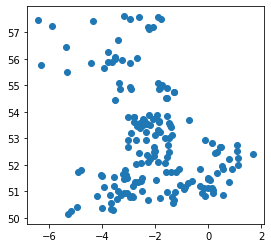

In [41]:
black_df = pd.read_csv("black.csv", encoding="utf-8")
black_df["Coordinates"] = black_df["Coordinates"].apply(lambda coords: [ord for ord in str(coords).split()])
split_lat_lon = pd.DataFrame(black_df["Coordinates"].tolist(), columns=["lat", "lon"])
split_lat_lon["lat"] = split_lat_lon["lat"].apply(lambda x: x[:-2])
split_lat_lon["lon"] = split_lat_lon["lon"].apply(lambda x: x[:-2] if x[-1] == "E" else f'-{x[:-2]}')
combined = pd.concat([black_df, split_lat_lon], axis=1, join='inner')
black_gdf = gpd.GeoDataFrame(combined, geometry=gpd.points_from_xy(combined.lon, combined.lat)).drop(["Coordinates", "OS grid", "lat", "lon"], axis=1)
black_gdf.plot()

In [42]:
white_df = pd.read_csv("white.csv", encoding="utf-8")
white_df["Coordinates"] = white_df["Coordinates"].apply(lambda coords: [ord for ord in str(coords).split()])
split_lat_lon = pd.DataFrame(white_df["Coordinates"].tolist(), columns=["lat", "lon"])
split_lat_lon["lat"] = split_lat_lon["lat"].apply(lambda x: x[:-2])
split_lat_lon["lon"] = split_lat_lon["lon"].apply(lambda x: x[:-2] if x[-1] == "E" else f'-{x[:-2]}')
combined = pd.concat([white_df, split_lat_lon], axis=1, join='inner')
white_gdf = gpd.GeoDataFrame(combined, geometry=gpd.points_from_xy(combined.lon, combined.lat)).drop(["Coordinates", "OS grid", "lat", "lon"], axis=1)
white_gdf.head()


,Location,Locality,geometry
0,Whiteacre,Kent,POINT (1.01000 51.18000)
1,Whiteadder Water,Scottish Borders,POINT (-2.34000 55.83000)
2,Whiteadder Water,East Lothian,POINT (-2.54000 55.85000)
3,Whiteash Green,Essex,POINT (0.60000 51.93000)
4,White Ball,Somerset,POINT (-3.29000 50.96000)


In [43]:
black_and_white = black_gdf.append(white_gdf)


<AxesSubplot:>

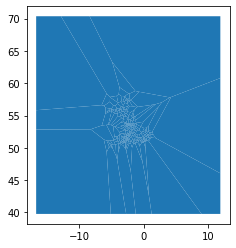

In [44]:
regions = black_and_white["geometry"].unary_union
voroni = {"geometry": voronoi_diagram(regions)}
voroni_gdf = gpd.GeoDataFrame(voroni)
voroni_gdf.plot()

<AxesSubplot:>

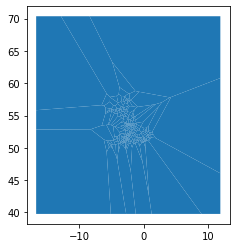

In [45]:
voroni_gdf = voroni_gdf.sjoin(black_and_white)
# voroni_gdf = voroni_gdf.set_crs(epsg=27700)
# voroni_gdf = voroni_gdf.to_crs(epsg=3587)
voroni_gdf.plot()

In [46]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
uk = world[(world.name == "United Kingdom")]

In [47]:
map = KeplerGl()
map.add_data(voroni_gdf.clip(uk))
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\dafydd.pearson\Miniconda3\lib\site-packages\geopandas\geodataframe.py:2106: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


KeplerGl(data={'unnamed': {'index': [301, 330, 269, 267, 317, 209, 288, 263, 280, 245, 293, 294, 239, 273, 306…